In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/kaggle/input/medicationcsv/RP_1 - Sheet1.csv")

In [3]:
data.columns
my_columns=['Name','Age','Sex','ELN_risk_group_AS_PER_2022','ECOG_PS', 'Induction_Mortality','Type_of_Induction']
data_imp=data.loc[:,my_columns]

In [4]:
data_imp.head(300)

,Name,Age,Sex,ELN_risk_group_AS_PER_2022,ECOG_PS,Induction_Mortality,Type_of_Induction
0,Pammi Singh,29,2,2,1,2,0
1,Rimpi Katiyar,32,2,1,1,2,0
2,Kirti Vardhan,29,1,2,1,2,0
3,Romil Vohra,57,2,1,2,2,0
4,Rakesh Khatri,53,1,3,1,2,0
5,Atul Kumar Chaudhary,32,1,3,1,2,0
6,Sachin Yadav,34,1,1,1,2,0
7,Umlesh Devi,49,2,1,1,2,0
8,Deepak Batra,37,1,1,0,2,1
9,Husna Jube,36,2,3,1,2,0


In [5]:
X=data_imp.drop("Induction_Mortality", axis="columns")
y=data_imp.Induction_Mortality

In [6]:
type(X)

pandas.core.frame.DataFrame

X in DataFrame consisting of independent variables and y is the dataframe consiting of dependent variable

In [7]:
y[y==1]=0
y[y==2]=1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    0
21    1
22    1
23    1
24    1
25    1
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
Name: Induction_Mortality, dtype: int64

In [9]:
X.corr()

,Age,Sex,ELN_risk_group_AS_PER_2022,ECOG_PS,Type_of_Induction
Age,1.000000,0.120181,-0.088087,0.196803,0.160605
Sex,0.120181,1.000000,-0.058936,0.071755,-0.081871
ELN_risk_group_AS_PER_2022,-0.088087,-0.058936,1.000000,0.210920,-0.331517
ECOG_PS,0.196803,0.071755,0.210920,1.000000,-0.223237
Type_of_Induction,0.160605,-0.081871,-0.331517,-0.223237,1.000000


the correlation between the variable the small(<0.4)

In [10]:
data_imp.corr()

,Age,Sex,ELN_risk_group_AS_PER_2022,ECOG_PS,Induction_Mortality,Type_of_Induction
Age,1.000000,0.120181,-0.088087,0.196803,0.012003,0.160605
Sex,0.120181,1.000000,-0.058936,0.071755,-0.289122,-0.081871
ELN_risk_group_AS_PER_2022,-0.088087,-0.058936,1.000000,0.210920,-0.225955,-0.331517
ECOG_PS,0.196803,0.071755,0.210920,1.000000,0.021898,-0.223237
Induction_Mortality,0.012003,-0.289122,-0.225955,0.021898,1.000000,0.305184
Type_of_Induction,0.160605,-0.081871,-0.331517,-0.223237,0.305184,1.000000


the depended variable is not highly correlated with the depended variable

<AxesSubplot:ylabel='Count'>

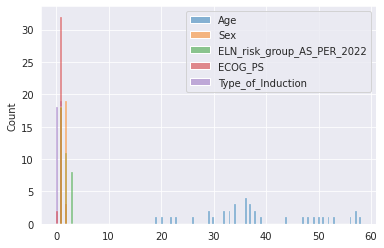

In [11]:
sns.set_style('darkgrid')
sns.histplot(X.drop("Name",axis='columns'))

In [12]:
X.describe()

,Age,Sex,ELN_risk_group_AS_PER_2022,ECOG_PS,Type_of_Induction
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,38.432432,1.513514,1.729730,1.027027,0.513514
std,10.848811,0.506712,0.804455,0.371669,0.506712
min,19.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000
50%,36.000000,2.000000,2.000000,1.000000,1.000000
75%,48.000000,2.000000,2.000000,1.000000,1.000000
max,58.000000,2.000000,3.000000,2.000000,1.000000


In [13]:
X.mean()
X.std()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Age                           10.848811
Sex                            0.506712
ELN_risk_group_AS_PER_2022     0.804455
ECOG_PS                        0.371669
Type_of_Induction              0.506712
dtype: float64

In [14]:
# Import python libraries required in this example:
from keras.models import Sequential
from keras.layers import Dense, Activation




In [15]:
# Use numpy arrays to store inputs (x) and outputs (y):
x = np.array(X.drop("Name",axis='columns'))
y_ = np.array(y) 


In [27]:
# Define the network model and its arguments. 
# Set the number of neurons/nodes for each layer:
model = Sequential()
model.add(Dense(5,input_shape=(5,),use_bias=True))
model.add(Activation('tanh'))
model.add(Dense(10,use_bias=True))
model.add(Activation('sigmoid')) 
model.add(Dense(1))
model.add(Activation('sigmoid')) 

# Compile the model and calculate its accuracy:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Print a summary of the Keras model:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 5)                 30        
_________________________________________________________________
activation_12 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                60        
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_14 (Activation)   (None, 1)                 0         
Total params: 101
Trainable params: 101
Non-trainable params: 0
________________________________________________________

In [28]:
model.fit(x,y_,epochs=900, batch_size=18)


Epoch 1/900
3/3 [==============================] - 1s 4ms/step - loss: 1.3566 - accuracy: 0.0811
Epoch 2/900
3/3 [==============================] - 0s 3ms/step - loss: 1.3348 - accuracy: 0.0811
Epoch 3/900
3/3 [==============================] - 0s 3ms/step - loss: 1.3130 - accuracy: 0.0811
Epoch 4/900
3/3 [==============================] - 0s 3ms/step - loss: 1.2917 - accuracy: 0.0811
Epoch 5/900
3/3 [==============================] - 0s 3ms/step - loss: 1.2710 - accuracy: 0.0811
Epoch 6/900
3/3 [==============================] - 0s 3ms/step - loss: 1.2501 - accuracy: 0.0811
Epoch 7/900
3/3 [==============================] - 0s 3ms/step - loss: 1.2295 - accuracy: 0.0811
Epoch 8/900
3/3 [==============================] - 0s 2ms/step - loss: 1.2103 - accuracy: 0.0811
Epoch 9/900
3/3 [==============================] - 0s 2ms/step - loss: 1.1909 - accuracy: 0.0811
Epoch 10/900
3/3 [==============================] - 0s 2ms/step - loss: 1.1717 - accuracy: 0.0811
Epoch 11/900
3/3 [===========